<a href="https://colab.research.google.com/github/themendu/covid_from_ctscan/blob/master/bayesian_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import colors
#from IPython import display
#import os
#from PIL import Image
from torch.utils.data.dataset import Dataset
#from scipy.misc import imread

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
pip install torchbnn

In [ ]:
pip install torchhk

In [ ]:
#pip install Augmentor

In [ ]:
import torchbnn as bnn
from torchhk import transform_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
device

device(type='cuda', index=0)

In [ ]:

import torchvision.models as models
import torch.nn as nn

model = models.resnet18(pretrained=True)

#model = models.alexnet(pretrained=True).to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
for param in model.parameters():
  param.requires_grad=True


In [ ]:
model.fc=nn.Sequential(
               nn.Linear(512,128),
               nn.ReLU(inplace=True),
#               nn.Dropout(p=0.2,inplace=False),
               nn.Linear(128, 2))

In [ ]:
transform_model(model, nn.Conv2d, bnn.BayesConv2d, 
                args={"prior_mu":0, "prior_sigma":0.2, "in_channels" : ".in_channels",
                      "out_channels" : ".out_channels", "kernel_size" : ".kernel_size",
                      "stride" : ".stride", "padding" : ".padding", "bias":".bias"
                     }, 
                attrs={"weight_mu" : ".weight"})

In [ ]:
transform_model(model, nn.Linear, bnn.BayesLinear, 
            args={"prior_mu":0, "prior_sigma":0.2, "in_features" : ".in_features",
                  "out_features" : ".out_features", "bias":".bias"
                 }, 
            attrs={"weight_mu" : ".weight"})

/usr/local/lib/python3.6/dist-packages/torchhk/transform.py:34: Warning:


 * Caution : The Input Model is CHANGED because inplace=True.



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
transform_model(model, nn.BatchNorm2d,bnn.modules.batchnorm.BayesBatchNorm2d, 
            args={"prior_mu":0, "prior_sigma":0.2, "num_features":".num_features","momentum":0.1
                 }, 
            attrs={"weight_mu" : ".weight"})

In [ ]:
model=model.to(device)

In [ ]:
#import Augmentor
#p = Augmentor.Pipeline(source_directory="/content/gdrive/My Drive/corona/bayesian/ct/",output_directory="/content/gdrive/My Drive/corona/bay_aug/ct/")
#p.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=8)
#p.rotate(probability=0.7, max_left_rotation=5, max_right_rotation=5)
#p.zoom_random(probability=0.7, percentage_area=0.95)
#p.flip_top_bottom(probability=0.7)
#p.rotate_random_90(probability=0.7)
#p.random_erasing(probability=0.7,rectangle_area=0.2)

#p.sample(1000)

In [ ]:
#p1 = Augmentor.Pipeline(source_directory="/content/gdrive/My Drive/corona/bayesian/xray/",output_directory="/content/gdrive/My Drive/corona/bay_aug/xray/")

#p1.random_distortion(probability=0.4, grid_width=4, grid_height=4, magnitude=8)
#p1.rotate(probability=0.4, max_left_rotation=5, max_right_rotation=5)
#p1.zoom_random(probability=0.4, percentage_area=0.95)
#p1.flip_top_bottom(probability=0.5)

#p1.sample(1000)

In [ ]:
#p1 = Augmentor.Pipeline(source_directory="/content/gdrive/My Drive/lp/dataset/neg/",output_directory="/content/gdrive/My Drive/corona/bay_aug/ood/")

#p1.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=8)
#p1.rotate(probability=0.7, max_left_rotation=5, max_right_rotation=5)
#p1.zoom_random(probability=0.7, percentage_area=0.95)
#p1.flip_top_bottom(probability=0.7)

#p1.sample(1000)

In [ ]:
from torchvision import transforms
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
              std=[0.229, 0.224, 0.225])])
path3="/content/gdrive/My Drive/corona/bay_aug/"



data=torchvision.datasets.ImageFolder(path3,transform=TRANSFORM_IMG)

In [ ]:
data

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: /content/gdrive/My Drive/corona/bay_aug/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
data.class_to_idx

{'ct': 0, 'ood': 1}

In [ ]:
train,test =torch.utils.data.random_split(data, [1900,100])


In [ ]:
del data


In [ ]:
dataloaders = {
    'train':
    torch.utils.data.DataLoader(train,
                                batch_size=64,
                                shuffle=True,
                                num_workers=0,
                                drop_last=True),  
    'validation':
    torch.utils.data.DataLoader(test,
                                batch_size=1,
                                shuffle=False,
                                num_workers=0,
                                drop_last=False)  
}

In [ ]:
#trainiter = iter(dataloaders['train'])
#features, labels = next(trainiter)
#features.shape, labels.shape

In [ ]:
#del features
#del labels
#del trainiter

In [ ]:
def precision(y_true:torch.Tensor, y_pred:torch.Tensor, is_training=False) -> torch.Tensor:

    assert y_true.ndim == 1
    assert y_pred.ndim == 1 or y_pred.ndim == 2
    
    if y_pred.ndim == 2:
        y_pred = y_pred.argmax(dim=1)
        
    
    tp = (y_true * y_pred).sum().to(torch.float32)
    fp = ((1-y_true) * y_pred).sum().to(torch.float32)
    
    epsilon = 1e-7
    precision = tp / (tp + fp + epsilon)
  
    return precision

In [ ]:
#model=torch.load('/content/gdrive/My Drive/corona/bayesian_aug.pt')


In [ ]:
#for param in model.parameters():
#  param.requires_grad=True
#model=model.to(device)


In [ ]:

criterion = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
factor = 1

optimizer = optim.Adam(model.parameters(),lr=0.0000005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.3, amsgrad=False)

In [ ]:
def train_model(model, criterion, optimizer, num_epochs,kl_loss):
    losses_train_list=[]
    losses_test_list=[]
    prec_train_list=[]
    prec_test_list=[]
    kl_train_list=[]
    kl_test_list=[]
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            running_kl=0.0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                kl=kl_loss(model)
                cost=loss+(factor*kl)

                if phase == 'train':
                    optimizer.zero_grad()
                    cost.backward()
                    optimizer.step()
                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_kl+=kl.item()

            if phase=='train':
                           epoch_loss = running_loss /1900
                           epoch_acc = running_corrects.double() /1900
                           epoch_kl=running_kl/1900
                           print('train precision score is : {}'.format(precision(labels.data.to('cpu'), outputs.data.to('cpu'))))
                           losses_train_list.append(epoch_loss)
                           prec_train_list.append(precision(labels.data.to('cpu'), outputs.data.to('cpu')))
                           kl_train_list.append(epoch_kl)


            else: 
                           epoch_loss = running_loss /100
                           epoch_acc = running_corrects.double() /100
                           epoch_kl=running_kl/100
                           print('valid precision score is : {}'.format(precision(labels.data.to('cpu'), outputs.data.to('cpu'))))
                           losses_test_list.append(epoch_loss)
                           prec_test_list.append(precision(labels.data.to('cpu'), outputs.data.to('cpu')))
                           kl_test_list.append(epoch_kl)

            

            print('{} loss: {:.4f}, acc: {:.6f}, kl:{:.6f}'.format(phase,
                                                        epoch_loss,
                                                        epoch_acc,
                                                        epoch_kl))


    return model,losses_train_list,losses_test_list,prec_train_list,prec_test_list,kl_train_list,kl_test_list

In [ ]:
model_trained1,a1,b1,c1,d1,e1,f1= train_model(model, criterion, optimizer, num_epochs=3,kl_loss=kl_loss)


In [ ]:
  import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(a1,label='train_loss')
plt.plot(b1,label='test_loss')
plt.plot(e1,label='kl_train')
plt.plot(f1,label='kl_test')

plt.xlabel("epochs")
plt.ylabel("value")
plt.title("train versus val plot")

plt.legend()
plt.show()

In [ ]:
#torch.save(model_trained1,'/content/gdrive/My Drive/corona/bayesian_aug.pt')
#resnet18,88% accuracy, test loss=1.5,kl_test_loss=0.3,kl_train_loss=0.03

In [ ]:
def get_uncertainty_per_image(model, input_image, T, normalized=False):
    input_image = input_image.unsqueeze(0)
    input_images = input_image.repeat(T, 1, 1, 1)

    net_out, _ = model(input_images)
    pred = torch.mean(net_out, dim=0).cpu().detach().numpy()
    if normalized:
        prediction = F.softplus(net_out)
        p_hat = prediction / torch.sum(prediction, dim=1).unsqueeze(1)
    else:
        p_hat = F.softmax(net_out, dim=1)
    p_hat = p_hat.detach().cpu().numpy()
    p_bar = np.mean(p_hat, axis=0)

    temp = p_hat - np.expand_dims(p_bar, 0)
    epistemic = np.dot(temp.T, temp) / T
    epistemic = np.diag(epistemic)

    aleatoric = np.diag(p_bar) - (np.dot(p_hat.T, p_hat) / T)
    aleatoric = np.diag(aleatoric)

    return pred, epistemic, aleatoric


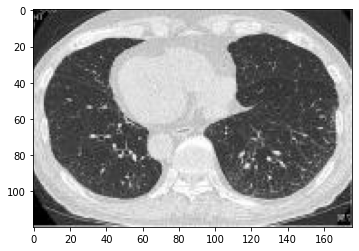

In [ ]:
import matplotlib.pyplot as plt

abc=plt.imread('/content/gdrive/My Drive/corona/bay_aug/ct/ct_original_6_3.jpg_f726454a-a2b2-456e-8ae6-aa3ee8c8ed9a.jpg')
plt.imshow(abc)

In [ ]:
def get_uncertainty_per_image(model, path, T, normalized=False):
    image = Image.open(path)
    image = loader(image).float()
    image = image.unsqueeze(0)
    input_image=image.to(device)
    input_images = input_image.repeat(T, 1, 1, 1)

    net_out = model(input_images)
    pred = torch.mean(net_out, dim=0).cpu().detach().numpy()
    if normalized:
        prediction = F.softplus(net_out)
        p_hat = prediction / torch.sum(prediction, dim=1).unsqueeze(1)
    else:
        p_hat = F.softmax(net_out, dim=1)
    p_hat = p_hat.detach().cpu().numpy()
    p_bar = np.mean(p_hat, axis=0)

    temp = p_hat - np.expand_dims(p_bar, 0)
    epistemic = np.dot(temp.T, temp) / T
    epistemic = np.diag(epistemic)

    aleatoric = np.diag(p_bar) - (np.dot(p_hat.T, p_hat) / T)
    aleatoric = np.diag(aleatoric)
    return pred, epistemic, aleatoric
 


In [ ]:
from torch.autograd import Variable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

get_uncertainty_per_image(model,'/content/gdrive/My Drive/corona/bay_aug/ct/ct_original_6_3.jpg_f726454a-a2b2-456e-8ae6-aa3ee8c8ed9a.jpg',10)

(array([ 21.65228 , -27.855183], dtype=float32),
 array([0., 0.], dtype=float32),
 array([0.000000e+00, 3.156332e-22], dtype=float32))